**Use for installation incase packages are missing**

In [1]:
#!pip install seaborn
#!pip install warnings

# Introduction

The goal of this project will be to analyse the 'MUSK' dataset obtained from https://archive.ics.uci.edu/ml/datasets/Musk+(Version+2) using various classification algorithms under 2 cases. One case where the dimensionality of the dataset is reduced to 2 using PCA and another case using all the 166 features present in the dataset. This problem would be a binary classification problem. 

We aim to study the effects of PCA on the dataset and compare the results of the classification problem using PCA and without. The decision boundaries of 2 different classifiers for different values of hyperparameters are visualised and the testing and training accuracy of the model are evaluated for multiple values of model hyperparameters. This will allow us to compare the performance of the models on this dataset under 2 different conditions. We can study the effect of overfitting, underfitting and regularisation through this.

# Methods

Here we will be using python for all aspects of the data analysis and building the machine learning models. We will be using the Pandas and Numpy libraries for data handling and scikit-learn for all ML related work. Matplotlib and Seaborn are used in plotting. The ML algorithms dealt with in this project are: 
                - Neural Networks
                - Supervised K-Nearest Neighbors

Below you find the code that implements these aspects of data handling and model building.

## Data loading and display

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set('paper',style="white", palette=None)
%matplotlib inline
plt.rcParams['figure.dpi'] = 1200
plt.rcParams['savefig.dpi'] = 3600

Here we load the dataset. The dataset describes a set of 92 molecules, 47 are judged by human experts to be musks and the remaining 45 molecules are judged to be non-musks. The goal is to learn to predict whether new molecules will be musks or non-musks. There are 166 features(columns) that describe these molecules which depend upon the exact shape, or conformation. There are 476 conformations. If a compound is a musk it is indicated by a 1 in the last column and a 0 in the last column indicates a compound is a non-musk. Columns 3 to 162 are "distance features" along rays The distances are measured in hundredths of Angstroms. The distances may be negative or positive, since they are actually measured relative to an origin placed along each ray. Column 163 represents the distance of the oxygen atom in themolecule to a designated point in 3-space. Columns 164 to 166 represent X-displacement from the designated, Y-displacement from the designated point and Z-displacement from the designated point. All columns except the first 2 and last are distance measures.

**Make sure the data file is in the same folder as notebook and the name is the same as what it was when downloaded from canvas.**

In [3]:
#Make sure the data file is in the same folder as notebook and named the same as what it is when downloaded from canvas. 

df = pd.read_csv('clean2.data',header= None) #clean2.data for larger dataset
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,168
0,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,...,-308,52,-7,39,126,156,-50,-112,96,1.0
1,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,...,-59,-2,52,103,136,169,-61,-136,79,1.0
2,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,...,-134,-154,57,143,142,165,-67,-145,39,1.0
3,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,...,-60,-4,52,104,136,168,-60,-135,80,1.0
4,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,...,-60,-4,52,104,137,168,-60,-135,80,1.0


We display the first and last 5 rows of the dataset to get an idea of how this looks like

In [4]:
df.tail(5)

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,168
6593,NON-MUSK-jp13,jp13_2+5,51,-123,-23,-108,-117,134,-160,82,...,-66,164,-14,-29,107,171,-44,-115,118,0.0
6594,NON-MUSK-jp13,jp13_2+6,44,-104,-19,-105,-117,142,-165,68,...,-51,166,-9,150,129,158,-66,-144,-5,0.0
6595,NON-MUSK-jp13,jp13_2+7,44,-102,-19,-104,-117,72,-165,65,...,90,117,-8,150,130,159,-66,-144,-6,0.0
6596,NON-MUSK-jp13,jp13_2+8,51,-121,-23,-106,-117,63,-161,79,...,86,99,-14,-31,106,171,-44,-116,117,0.0
6597,NON-MUSK-jp13,jp13_2+9,51,-122,-23,-106,-117,190,-161,80,...,40,124,-14,-30,107,171,-44,-115,118,0.0


We rename the columns with strings and the last column as labels to allow us to identify them easily.

In [5]:
df = df.rename(columns = {0:"Compound Name",1 :"Conformation Name",168:"labels"})
df

,Compound Name,Conformation Name,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,labels
0,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,...,-308,52,-7,39,126,156,-50,-112,96,1.0
1,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,...,-59,-2,52,103,136,169,-61,-136,79,1.0
2,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,...,-134,-154,57,143,142,165,-67,-145,39,1.0
3,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,...,-60,-4,52,104,136,168,-60,-135,80,1.0
4,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,...,-60,-4,52,104,137,168,-60,-135,80,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,NON-MUSK-jp13,jp13_2+5,51,-123,-23,-108,-117,134,-160,82,...,-66,164,-14,-29,107,171,-44,-115,118,0.0
6594,NON-MUSK-jp13,jp13_2+6,44,-104,-19,-105,-117,142,-165,68,...,-51,166,-9,150,129,158,-66,-144,-5,0.0
6595,NON-MUSK-jp13,jp13_2+7,44,-102,-19,-104,-117,72,-165,65,...,90,117,-8,150,130,159,-66,-144,-6,0.0
6596,NON-MUSK-jp13,jp13_2+8,51,-121,-23,-106,-117,63,-161,79,...,86,99,-14,-31,106,171,-44,-116,117,0.0


In [6]:
df["labels"].astype(int)
LABELS = df["labels"]
LABELS = LABELS.astype(int)
LABELS = np.array(LABELS)

In [7]:
ones_ind = np.argwhere(LABELS == 1)
zeros_ind = np.argwhere(LABELS == 0)

## Principal component analysis

Below we get the required columns numbered 3 to 167 as the dataset for classification using machine learning and in PCA. 

In [8]:
X = df1 = df.iloc[:,2:-1]
X = np.array(X)
X.shape

(6598, 166)

Below we perform Principal component analysis to reduce the dimensionality of the dataset. The original dataset has 166 columns that we can use for a classification algorithm. It is however impossible to be able to visualise these 166 dimensions to see how the data is structured. Since visualisation is an important part of data analysis, we use PCA to reduce this dataset to 2 dimensions so that we can visualise. PCA uses an algorithm to implement linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. This is done by using the sklearn library that implements PCA for us.

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2,whiten = True,svd_solver = 'full')
A = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

[0.35020974 0.19804048]
0.548250221585394


The above values of the explained variance ratio allow us to estimate as a percentage how much of the variance in the data can be explained through these 2 dimensions. The sum of the explained variance ratios for both these columns tells us that around 54% of the variation of data in the dataset can be explained using these 2 columns. 

Now we plot the dataset in 2 dimensions, with the ones(musk) in blue and zeros(non-musks) in red.

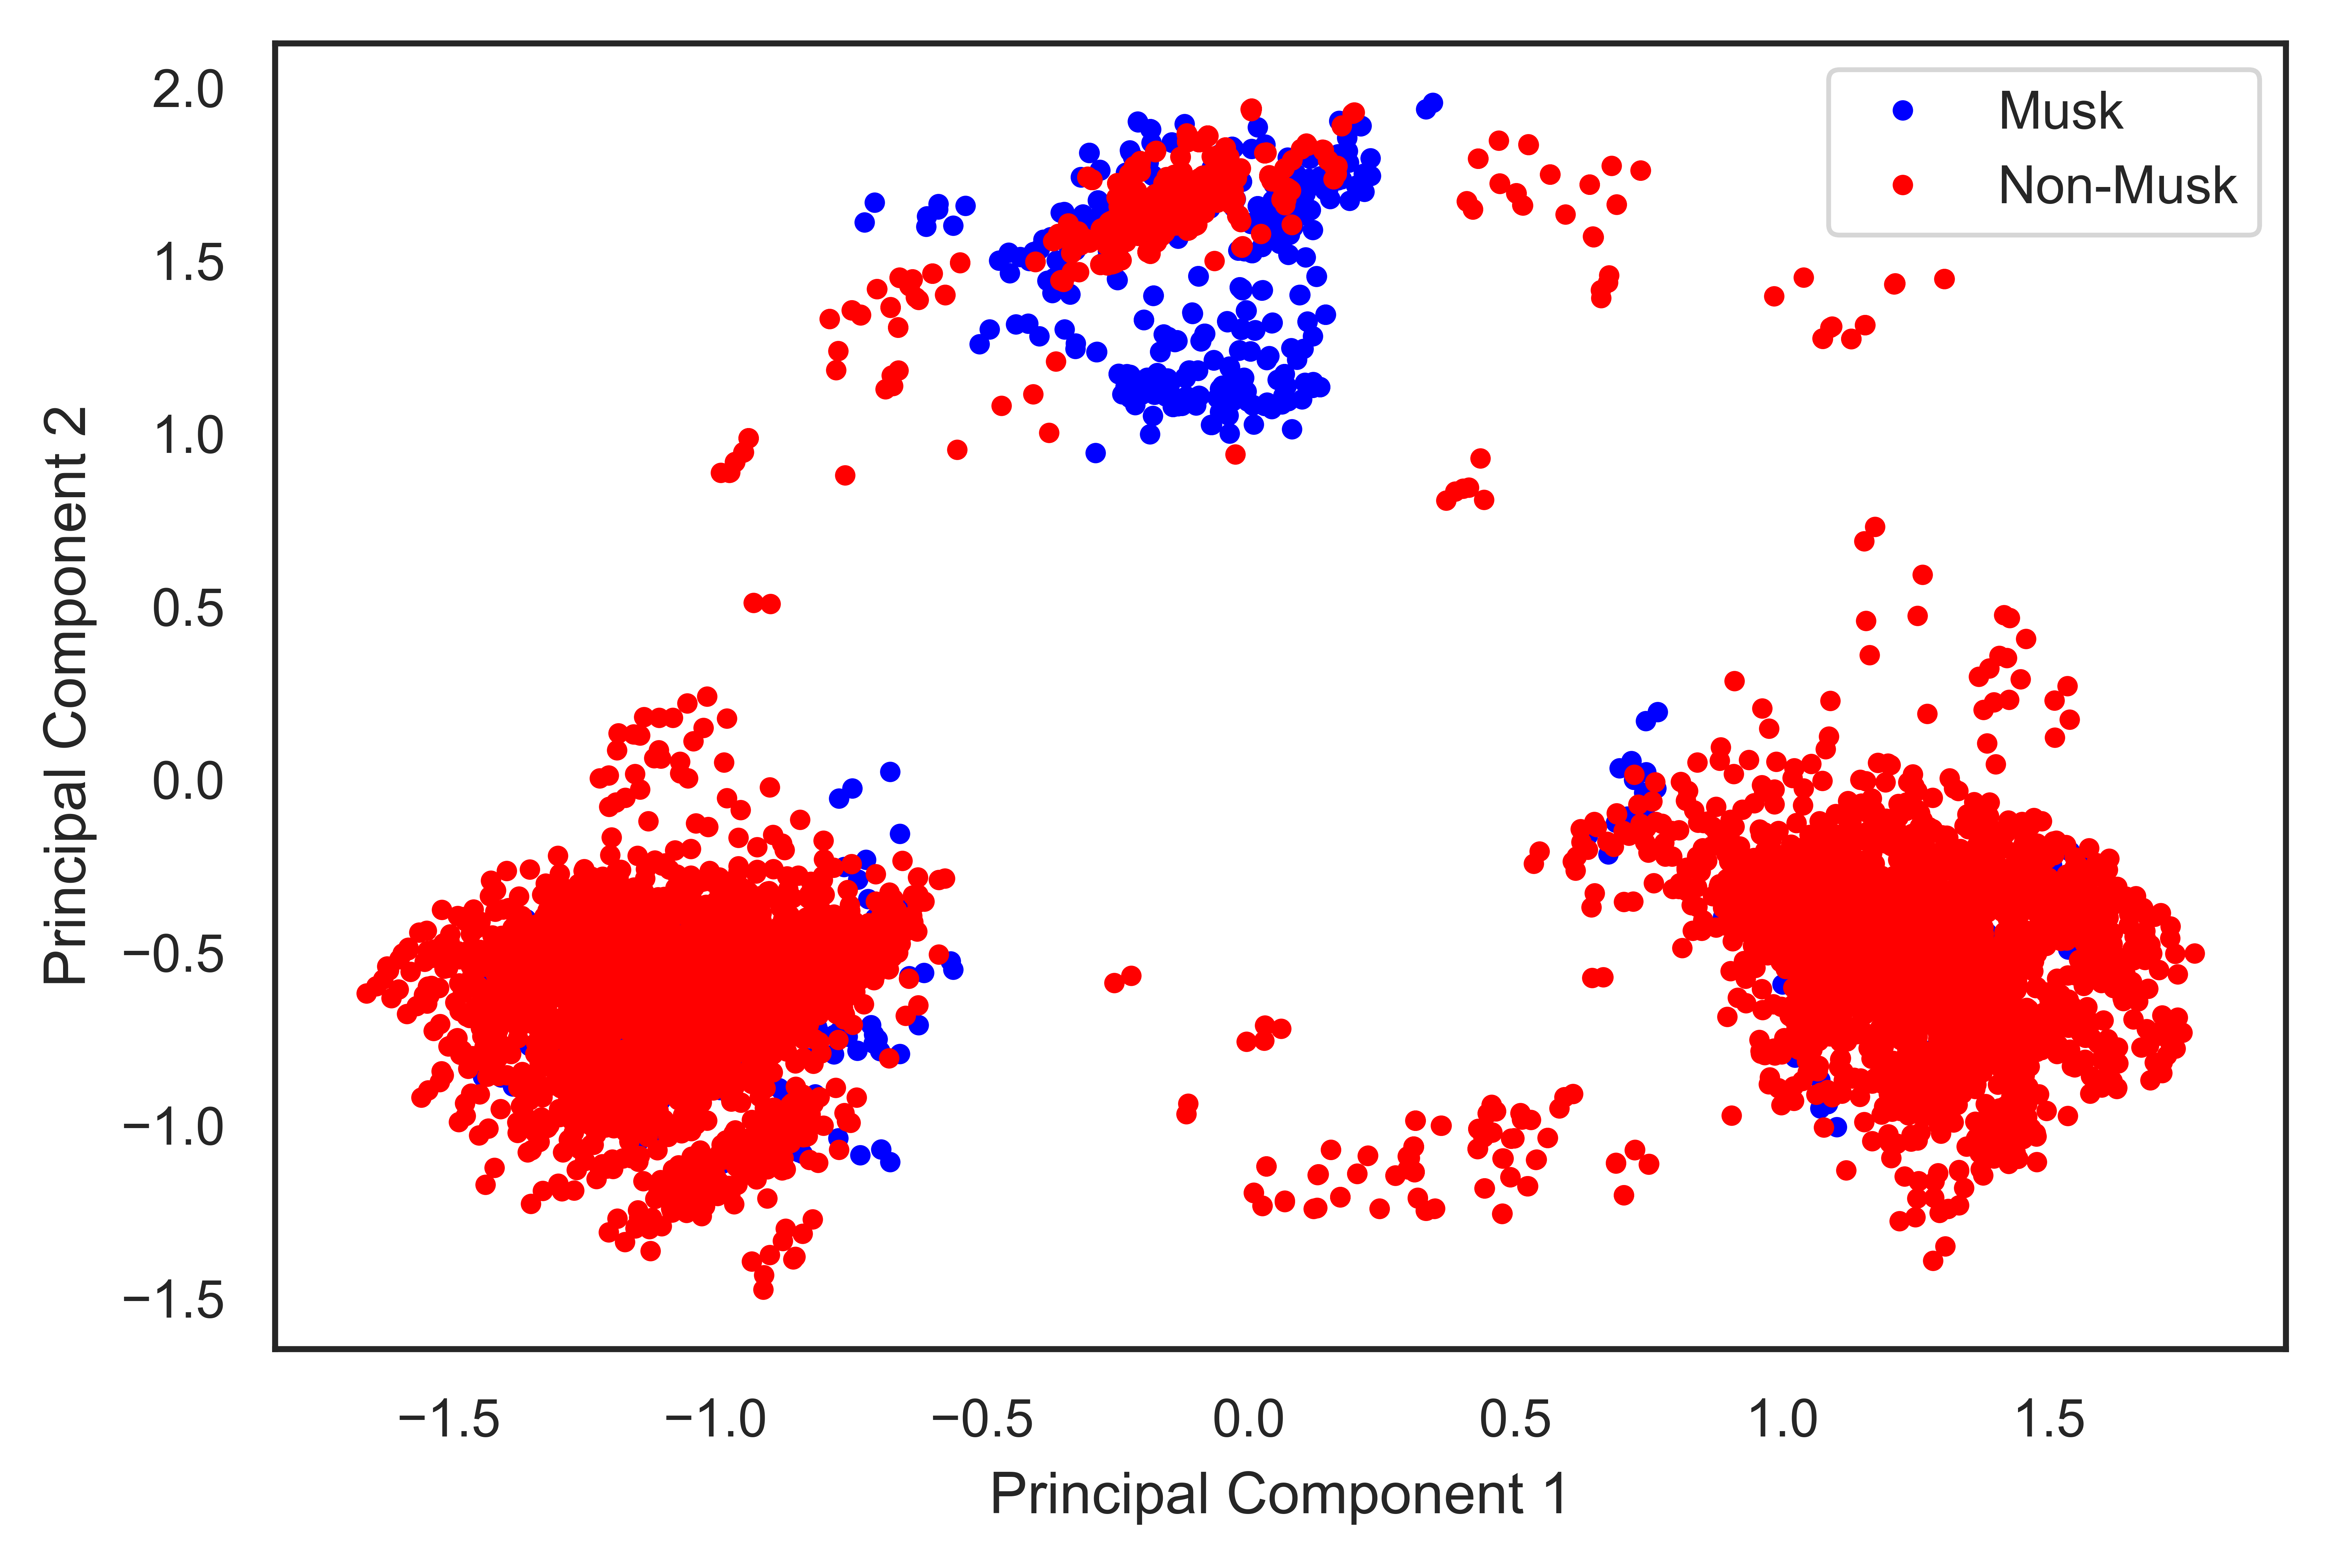

In [10]:
plt.plot(A[ones_ind,0],A[ones_ind,1],'b.',label = 'Musk')
plt.plot(A[zeros_ind,0],A[zeros_ind,1],'r.',label = 'Non-Musk')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.savefig('PCA.pdf')
plt.show()


As we can clearly see from the graph above the data is very closely clustered in 2 dimension. This would make classification of this dataset in 2 dimension very difficult. We are now going to use classification algorithms on this reduced dimesion dataset and compare the results with the actual dataset. We know for sure the second case will perform better, however we are still interested in aspects like the decision boundaries and hyperparameters used in both cases and how if affects accuracy in training and testing data.

## Neural Network 

A neural network is one of the most common and popular machine learning models. It consists of a sequence of hidden layers each with a fixed number of nodes(hidden units). Key idea is to find the weights that are passed through each nodes to provide the values in the output. These weights are found by minimising an objective function at every iteration until the optimal ones are found. Popular methods include gradient descent and stochastic gradient descent. 

Here we use the sklearn inbuilt NN classifier. The data is first split into train and test. We use a 80-20 split for train and test respectively. 

Now let us proceed by implementing the Neural network and KNN for the full dataset with all 166 features.

## Neural Network (with all features)

In [11]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, LABELS, test_size=0.2,random_state = 1)
X1_train.shape,X1_test.shape

((5278, 166), (1320, 166))

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X1_train)
X1_train = scaler.transform(X1_train)
X1_test = scaler.transform(X1_test)

In [13]:
p = np.linspace(1,100,100,endpoint = True,dtype = int)
p

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

CV_scores = np.array([])

for k in p:
    clf_NN1 = MLPClassifier(activation = 'relu',solver='sgd', alpha=1e-4,hidden_layer_sizes=(k,),random_state = 1)
    scores = cross_val_score(clf_NN1, X1_train, y1_train, cv=5)
    CV_scores = np.append(CV_scores,np.mean(scores))
INDEX = np.argmax(CV_scores)
hu = p[INDEX]
print('Number of hidden units we will use is:',hu)

Number of hidden units we will use is: 90


Here we can clearly see that the number of hidden units is much higher than in the case of the reduced dimension dataset. In fact this value is closer to 50, akin to the one we expected for the previous case. This can be explained quite easily. The 2 features after PCA accounted for only 54% of the variance in the dataset. The other columns clearly make a difference, which makes sense, that's why they exist. 

In [15]:
score = CV_scores[INDEX]
print('Associated cross validation score is:',score)

Associated cross validation score is: 0.9689284431997702


In [16]:
clf_NN1 = MLPClassifier(activation = 'relu',solver='sgd', alpha=1e-4,hidden_layer_sizes=(p[INDEX],),random_state = 1)
clf_NN1.fit(X1_train, y1_train)

MLPClassifier(hidden_layer_sizes=(90,), random_state=1, solver='sgd')

With all the features the neural network achieves a 100% accuracy on the training dataset. 

In [17]:
hidden_units_1 = np.arange(1,101)
hidden_units = hidden_units_1.tolist()
test_accuracy = []
train_accuracy = []

#### NOT NEEDED

In [18]:
'''from operator import itemgetter

for i,k in enumerate(hidden_units):
    clf_NN1 = MLPClassifier(activation = 'relu',solver='sgd', alpha=1e-4,hidden_layer_sizes=(k,),random_state = 1)
    clf_NN1.fit(X1_train, y1_train)
    predicted_labels = clf_NN1.predict(X1_test)
    error = 0
    for j in range(len(predicted_labels)):
        if predicted_labels[j] != y1_test[j]:
            error += 1
    test_accuracy.append(1 - error/len(predicted_labels))
    
    predicted_labels1 = clf_NN1.predict(X1_train)
    error1 = 0
    for j in range(len(predicted_labels1)):
        if predicted_labels1[j] != y1_train[j]:
            error1 += 1
    train_accuracy.append(1 - error1/len(predicted_labels1))

hu_index, best_accuracy = max(enumerate(test_accuracy), key=itemgetter(1))

hu_max = hidden_units[hu_index]

plt.plot(hidden_units,train_accuracy,'b-',label = 'Training Accuracy')
plt.plot(hidden_units,test_accuracy,'r-',label = 'Testing Accuracy')
plt.plot(hu_max,best_accuracy,'go')
plt.xlabel('Hidden Units')
plt.ylabel('Prediction Accuracy')
plt.show()'''

"from operator import itemgetter\n\nfor i,k in enumerate(hidden_units):\n    clf_NN1 = MLPClassifier(activation = 'relu',solver='sgd', alpha=1e-4,hidden_layer_sizes=(k,),random_state = 1)\n    clf_NN1.fit(X1_train, y1_train)\n    predicted_labels = clf_NN1.predict(X1_test)\n    error = 0\n    for j in range(len(predicted_labels)):\n        if predicted_labels[j] != y1_test[j]:\n            error += 1\n    test_accuracy.append(1 - error/len(predicted_labels))\n    \n    predicted_labels1 = clf_NN1.predict(X1_train)\n    error1 = 0\n    for j in range(len(predicted_labels1)):\n        if predicted_labels1[j] != y1_train[j]:\n            error1 += 1\n    train_accuracy.append(1 - error1/len(predicted_labels1))\n\nhu_index, best_accuracy = max(enumerate(test_accuracy), key=itemgetter(1))\n\nhu_max = hidden_units[hu_index]\n\nplt.plot(hidden_units,train_accuracy,'b-',label = 'Training Accuracy')\nplt.plot(hidden_units,test_accuracy,'r-',label = 'Testing Accuracy')\nplt.plot(hu_max,best_accu

In [14]:
from sklearn import metrics

clf_NN1 = MLPClassifier(activation = 'relu',solver='sgd', alpha=1e-4,hidden_layer_sizes=(hu,),random_state = 1) # with nesterov momentum
clf_NN1.fit(X1_train, y1_train) 
print(clf_NN1.score(X1_test,y1_test))
ypred1 = clf_NN1.predict(X1_test)
fpr, tpr, thresholds = metrics.roc_curve(y1_test, ypred1)
print(metrics.auc(fpr, tpr))

clf_NN3 = MLPClassifier(activation = 'relu',solver='adam', alpha=1e-4,hidden_layer_sizes=(hu,),random_state = 1,tol = 0.000001)
clf_NN3.fit(X1_train, y1_train)
print(clf_NN3.score(X1_test,y1_test))
ypred2 = clf_NN3.predict(X1_test)
fpr1, tpr1, thresholds = metrics.roc_curve(y1_test, ypred2)
print(metrics.auc(fpr1, tpr1))

clf_NN2 = MLPClassifier(activation = 'relu',solver='sgd', alpha=1e-4,hidden_layer_sizes=(hu,),random_state = 1) # with nesterov momentum
clf_NN2.fit(X1_test, y1_test)

clf_NN4 = MLPClassifier(activation = 'relu',solver='adam', alpha=1e-4,hidden_layer_sizes=(hu,),random_state = 1,tol = 0.000001)
clf_NN4.fit(X1_test, y1_test)

confusion_matrix = metrics.confusion_matrix(ypred1, y1_test)
print("Confusion Matrix: ")
print(confusion_matrix)
print()

confusion_matrix = metrics.confusion_matrix(ypred2, y1_test)
print("Confusion Matrix: ")
print(confusion_matrix)
print()



NameError: name 'MLPClassifier' is not defined

In [18]:
from sklearn.model_selection import learning_curve

def plot_learning_curve_NN():
    train_sizes, train_scores, test_scores = learning_curve(MLPClassifier(activation = 'relu',solver='sgd', alpha=1e-4,hidden_layer_sizes=(hu,),random_state = 1), X1_train, y1_train, cv=5)
    title1 = "Comparison of optimizers with loss curves"
    title2 = "Learning Curve Neural Network (SGD)"
    fig,(ax1,ax2) = plt.subplots(1,2,figsize = (12,7))
    #ax1.set_title(title1)
    #ax2.set_title(title2)

    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Training Loss")

    ax2.set_xlabel("Number of training examples")
    ax2.set_ylabel("Accuracy")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    ax1.plot(clf_NN1.loss_curve_,'b-',label = 'Training loss(SGD)')
    #plt.plot(clf_NN2.loss_curve_,'b--',label = 'test loss(sgd)')
    ax1.plot(clf_NN3.loss_curve_,'r-',label = 'Training loss(Adam)')

    ax1.legend(loc="best")
    ax2.legend(loc="best")
    fig.savefig('NN_graphs.pdf')




In [19]:
plot_learning_curve_NN()

NameError: name 'MLPClassifier' is not defined

In [20]:
from sklearn.svm import SVC  # "Support Vector Classifier"
clf1 = SVC(kernel='rbf', gamma='scale')
clf1.fit(X1_train, y1_train)
ypred1 = clf1.predict(X1_test)
acc1 = metrics.accuracy_score(ypred1, y1_test)
print("Accuracy: %f\n" % acc1)

clf2 = SVC(kernel='linear', gamma='scale')
clf2.fit(X1_train, y1_train)
ypred2 = clf2.predict(X1_test)
acc2 = metrics.accuracy_score(ypred2, y1_test)
print("Accuracy: %f\n" % acc2)

clf3 = SVC(kernel='poly', gamma='scale') #cubic
clf3.fit(X1_train, y1_train)
ypred3 = clf3.predict(X1_test)
acc3 = metrics.accuracy_score(ypred3, y1_test)
print("Accuracy: %f\n" % acc3)

clf4 = SVC(kernel='sigmoid')
clf4.fit(X1_train, y1_train)
ypred4 = clf4.predict(X1_test)
acc4 = metrics.accuracy_score(ypred4, y1_test)
print("Accuracy: %f\n" % acc4)


Accuracy: 0.966667

Accuracy: 0.959091

Accuracy: 0.965152

Accuracy: 0.862879



In [35]:
def plot_learning_curve_SVM():
    train_sizes, train_scores, test_scores = learning_curve(SVC(kernel='rbf', gamma='scale'), X1_train, y1_train, cv=5)
    #title1 = "Accuracy variation with SVM kernels"
    #title2 = "Learning Curve SVM (rbf)"
    fig,(ax1,ax2) = plt.subplots(1,2,figsize = (12,7))

    #ax2.set_title(title2)
    ax2.set_xlabel("Number of training examples")
    ax2.set_ylabel("Accuracy")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    ax2.legend(loc="best")

    kernel = ['RBF','Linear','Cubic','Sigmoid']
    accuracies = [acc1,acc2,acc3,acc4]
    accuracies1 = [ round(elem, 2) for elem in accuracies ]
    bars = ax1.bar(kernel,accuracies1,color=['black', 'red', 'green', 'blue'])
    #ax1.set_title(title2)
    ax1.bar_label(bars)
    ax1.set_xlabel('Kernel')
    ax1.set_ylabel('Accuracy')
    fig.savefig('SVM_graphs.pdf')


In [36]:
plot_learning_curve_SVM()

These results above are similar to the one obtained in the previous case. The values differ, but the trend remains consistent. The accuracies are much higher. This could be a moment to instantly proclaim using all features is consistently better and there is no reason to have techniques like PCA. Remember though there are inherent advantages to using PCA. First and foremost it allowed us to visualize certain aspects of the model. Secondly reducing the number of features drastically reduces the computation time as the dataset increases in size. Even for this example of MUSK classification, with the larger dataset, you would find that the accuracies are acceptable with PCA (in the low 90s). The accuracies with the full 166 dimensions is always going to be superior, key tradeoff is the computational time. Surprisingly often PCA is used on very high dimension data sets, ones with over 500 features and several thousand data points to great effect. 

Here the difference is more stark. The neural network clearly performs better than KNN.KNN is still very popular though. KNN requires no training time, whereas training neural networks is rather time-intensive. However KNN will probably take much longer at evaluation time.KNN is very simple and requires tuning only one hyperparameter , while neural net training involves many hyperparameters that we are required to provide and often this is a difficult task.

For this particular dataset Neural network seems to perform better, however with the larger dataset, we will see that there wouldn't be particularly too much difference in the accuracies. Both models yield accuracies in the mid 90s. 

# Conclusion

We can conclude the following salient points:
    - There is no real concept of best model. It varies based on the dataset and various other considerations predominant among which is computational difficulty. For example, for a dataset with a very large number of samples, and large predictions training a neural network might be more efficient. Again this is no gurantee there may be other factors in play.
    
    - There are clear advantages and disadvantages to using PCA to reduce the dimensionality of the dataset. Again additional thought has to be given to the problem at hand and one should make decisions based on the dataset. There is no one universally agreed upon way to approach classification problems. For a particular dataset however, one model might have clear advantages over another and should be preffered. 
    
    - For this particular case, a neural network is the most well suited. However, this too has a caveat. With a larger dataset, with more samples KNN performs well too. In such cases thought should be given to the other factors in consideration.